In [ ]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subta

In [ ]:
pip install spicy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Funciones de carga y preparación de datos

In [ ]:
import sys
import os
import pandas as pd
import spicy as sp
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt 
    que se introduce en su entrada. 
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()
  
  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

In [ ]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1
# Instalamos spacy y uno de sus modelos
!pip install --upgrade spacy
!pip install spacy 
!python -m spacy download es_core_news_sm
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('opinion_lexicon')
nltk.download('subjectivity')
nltk.download('wordnet')
!pip install emosent-py
!pip install emoji_extractor
!pip install emoji
# Download emoji sentiment
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1265996963805306882.txt  
  inflating: profner/subtask-1/test-background-txt-files/1266728148915441664.txt  
  inflating: profner/subtask-1/test-background-txt-files/1266744228341780480.txt  
  inflating: profner/subtask-1/test-background-txt-files/1267161362473639943.txt  
  inflating: profner/subtask-1/test-background-txt-files/1267610290407059458.txt  
  inflating: profner/subtask-1/test-background-txt-files/1267754452372635649.txt  
  inflating: profner/subtask-1/test-background-txt-files/1268806992652652544.txt  
  inflating: profner/subtask-1/test-background-txt-files/1269333414190219264.txt  
  inflating: profner/subtask-1/test-background-txt-files/1269413963596472328.txt  
  inflating: profner/subtask-1/test-background-txt-files/1270608327349800961.txt  
  inflating: profner/subtask-1/test-background-txt-files/1271110596197482498.txt  
  inflating: profner/subta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-25 19:12:39.014034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 37.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-05-25 19:13:04--  https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘allzip’

allzip                  [  <=>               ]  94.61K   395KB/s    in 0.2s    

2023-05-25 19:13:05 (395 KB/s) - ‘allzip’ saved [96878]

Archive:  allzip
  inflating: ESR_v1.0_format.txt     
  inflating: Emoji_Sentiment_Data_v1.0.csv  
  inflating: Emojitracker_20150604.csv  


# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob). 
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


In [ ]:
pip install emoji-extractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for emoji-extractor: filename=emoji_extractor-2.0.0-py3-none-any.whl size=64157 sha256=50d6697a2fffd880e6f54c74b3e2bcac81003f77a460a7b55f73a2e2dbf0dc8e
  Stored in directory: /root/.cache/pip/wheels/14/89/95/33d1b161e1daa8fb2dec089e887d3620d3a318fdb0798e9f58
Successfully built emoji-extractor


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=75caba8dbbf68d262ca6dc5d6b044bdc9a4fe0ea0b53296fdb687dade0b86bd9
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


## 0. Imports


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import string 
import re 
from tqdm.autonotebook import tqdm
tqdm.pandas()

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from textblob import TextBlob
from emoji_extractor.extract import Extractor
import emoji
from textblob import Word 

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [ ]:
def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

In [ ]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [ ]:
datos_ejercicio["tweet_text"][26]


# indices = datos_ejercicio.loc[datos_ejercicio['label'] == 1].index

# # Mostrar los índices resultantes
# print(indices)

'📌7 Abril #diamundialdelasalud  📌@WHO lo dedica a las enfermeras, con el lema "Apoye a las enfermeras y matronas" destaca algunos objetivos #NursingNow 2020 📌En pandemia #Covid_19 su labor es esencial!💪 #QuedateEnCasa #EsteVirusLoParamosUnidos @saludand https://t.co/vRBpcUGXY9 https://t.co/4HjVZ8hyGN'

## 2. Análisis exploratorio

Lo primero que siemrpe se debe hacer es echar un vistazo a la estructura del dataframe que queremos estudiar.

In [ ]:
print(datos_ejercicio.shape[1])  # numero de filas
print(datos_ejercicio.shape[0])  # numero de columnas

4
8000


Empezamos contando los NA del dataset y eliminando los duplicados.

In [ ]:
na_count = datos_ejercicio.isna().sum().sum()
print(f"Hay {na_count} valores peridios")

null_count = datos_ejercicio.isnull().sum().sum()
print(f"Hay {null_count} valores duplicados")

duplicated_count = datos_ejercicio.duplicated().sum()
print(f"Hay {duplicated_count} valores duplicados")

Hay 0 valores peridios
Hay 0 valores duplicados
Hay 0 valores duplicados


En este caso no se tiene que hacer nada porque no hay valores perdidos.

Como parte del análisis exploratorio inicial, nos interesaria ver el numero de tweets que contienen alguna profesión para contrastarlo con el numero de tweets que no lo hacen. Esta informacion nos la porpociona la columna "label" de nuestro dataset.


0    6130
1    1870
Name: label, dtype: int64


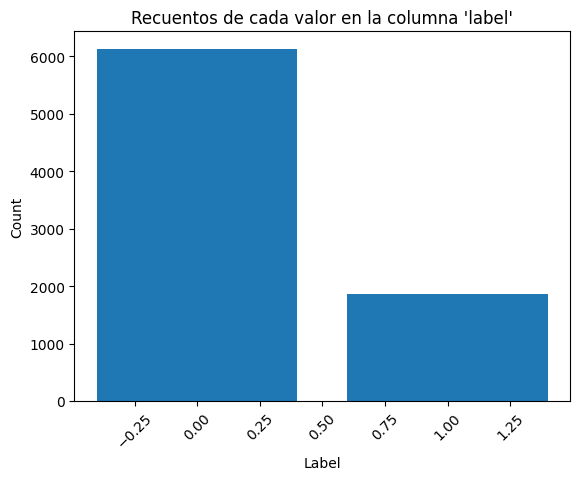

In [ ]:
count_label = datos_ejercicio["label"].value_counts()
print(count_label)

plt.bar(count_label.index, count_label.values)

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Recuentos de cada valor en la columna 'label'")
plt.xticks(rotation=45)

plt.show()

En un primer vistazo observamos que el dataset está bastante desbalanceado ya que hay muchos más tweets que mencionan una profesión que los que no.

Vamos a medir la longitud del texto de cada tweet para representarlos conjuntamente y observar patrones.


<ipython-input-23-6b1a960df07a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figI = sns.distplot(datos_ejercicio[datos_ejercicio.label==0].text_lenght, hist=True)
<ipython-input-23-6b1a960df07a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figII = sns.distplot(datos_ejercicio[datos_ejercicio.label==1].text_lenght

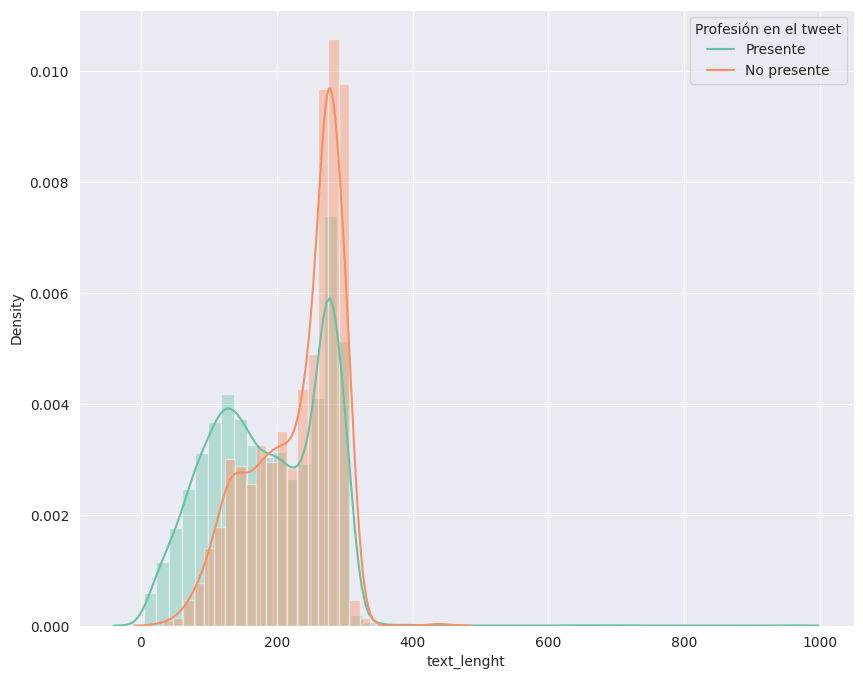

In [ ]:
datos_ejercicio["text_lenght"] = datos_ejercicio["tweet_text"].apply(lambda x:len(x))


fig = plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
sns.set_palette("Set2") 

figI = sns.distplot(datos_ejercicio[datos_ejercicio.label==0].text_lenght, hist=True)
figII = sns.distplot(datos_ejercicio[datos_ejercicio.label==1].text_lenght, hist=True)

plt.legend(title='Profesión en el tweet', labels=['Presente', 'No presente'], loc='upper right')

plt.show()



Vamos a crear una nube de palabras o WordCloud a partir de los datos del corpus utilizando la biblioteca WordCloud. Primero, concatenamos todas las frases del corpus en un solo texto utilizando join() y almacenamos el resultado en la variable corpus_texto. Luego, creamos un objeto WordCloud sin especificar stopwords (palabras vacías) para que se muestren todas las palabras en la nube.

Una WordCloud es una visualización que muestra las palabras más frecuentes en un texto, donde el tamaño de cada palabra representa su frecuencia. Las stopwords son palabras comunes que generalmente se omiten en el análisis de texto porque no aportan información relevante. Estas palabras, como "a", "el", "es", etc., se excluyen del cálculo de frecuencia y se ignoran al generar la WordCloud.

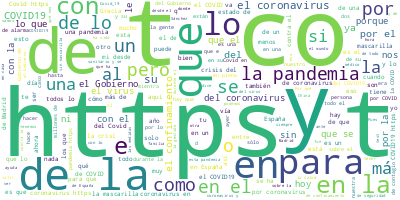

In [ ]:
union = ','.join(list(datos_ejercicio['tweet_text'].values))

wordCloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')

wordCloud.generate(union)
wordCloud.to_image()

## 3. Preprocesado y Normalización

1. El primer paso sera eliminar los emojis que aparecen en el texto.

In [ ]:
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el número de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict


In [ ]:
# Función para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

In [ ]:
emoji_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")
datos_ejercicio["emoji_list"] = datos_ejercicio["tweet_text"].apply(lambda x: extract_emojis(x))
datos_ejercicio["emoji_list"]

0        []
1        []
2        []
3        []
4        []
       ... 
7995     []
7996     []
7997     []
7998    [🤮]
7999    [🤣]
Name: emoji_list, Length: 8000, dtype: object

In [ ]:
# Eliminar los emojis de un texto. Esto es útil porque una vez extraido los emojis
# puede interesarnos tener un texto sin presencia de emojis para mejor análisis.
def clean_emoji(text):
    # Poner todos los comandos de http://www.unicode.org/Public/emoji/1.0/emoji-data.txt
    emoji_pattern = re.compile("["
        u"\U0001F300-\U0001F6FF"  # symbols & pictographs
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u'\u2600-\u26FF\u2700-\u27BF'
        u'\u2934' u'\u2935' u'\u2B05' u'\u2B06' u'\u2B07' u'\u2B1B' u'\u2B1C' 
        u'\u2B50' u'\u2B55' u'\u3030' u'\u303D' u'\u3297' u'\u3299' u'\u00A9'
        u'\u00AE' u'\u203C' u'\u2049' u'\u2122' u'\u2139' u'\u2194-\u2199' 
        u'\u21A9' u'\u21AA' u'\u231A' u'\u231B' u'\u2328' u'\u23CF'
        u'\u23E9-\u23F3' u'\u23F8' u'\u23F9' u'\u23FA' u'\u24C2' u'\u25AA'
        u'\u25AB' u'\u25B6' u'\u25C0' u'\u25FB' u'\u25FD' u'\u25FC' u'\u25FE'
        ']+', flags=re.UNICODE)
    string2 = re.sub(emoji_pattern,r' ',text)
    return string2

In [ ]:
# Calcula el sentimiento de los emojis de una lista utilizando el diccionario
# de emoji sentiment score generado previamente con la función load_emoji_sentiment()
# Se puede extraer el valor de positividad de los emojis con la option "positive"
# Se puede extraer el valor de neutralidad de los emojis con la option "neutral""  
# Se puede extraer el valor de e negatividad de los emojis con la option "negative""  

def get_emoji_sentiment(lista, option = "positive"):
  output = 0
  for emoji in lista:
    try:
      if option == "positive":
        output = output + emoji_sent_dict[emoji]["Positive"]
      elif option =="negative":
        output = output + emoji_sent_dict[emoji]["Negative"]
      elif option =="neutral":
        output = output + emoji_sent_dict[emoji]["Neutral"]
    except Exception as e: 
      continue
  return output

In [ ]:
datos_ejercicio["sent_emoji_pos"] = datos_ejercicio["emoji_list"].apply(lambda x: get_emoji_sentiment(x,option="positive"))
datos_ejercicio["sent_emoji_neu"] = datos_ejercicio["emoji_list"].apply(lambda x: get_emoji_sentiment(x,option="neutral"))
datos_ejercicio["sent_emoji_neg"] = datos_ejercicio["emoji_list"].apply(lambda x: get_emoji_sentiment(x,option="negative"))

2. Procesamiento del textos.

In [ ]:
def erase_links(text):
  return [re.sub('https:\/\/\S*\s?', '', x) for x in text]

# Quitar/eliminar las comillas
def erase_quotation(text):
  return [re.sub('\"', ' ', x) for x in text]

# Calcular número de veces que se detecta un determinado patrón
def count_regex(pattern, tweet):
  return len(re.findall(pattern, tweet))

# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(text):
  tweet_tokenizer = TweetTokenizer()
  tokens_list = tweet_tokenizer.tokenize(text)
  return tokens_list

# Quitar stop words
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('spanish')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence


# Eliminar signos de puntuación (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words


# Lemmatization
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])
def lemmatisation(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return mytokens

stemmer = PorterStemmer()
def stem(tokens):
    tokens = [ stemmer.stem(token) for token in tokens]
    return tokens

In [ ]:

datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text"].apply(lambda x: clean_emoji(x))  # Se borran los emojis del texto 

datos_ejercicio["mentions"] =  datos_ejercicio["tweet_text_processed"].apply(lambda x: count_regex(r'@\w+', x))  # Vemos el número de menciones 

datos_ejercicio["hashtags"] =  datos_ejercicio["tweet_text_processed"].apply(lambda x: count_regex(r'#\w+', x)) # vemos el numero de Hagstags

datos_ejercicio["tokenized"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: tokenize(x))  # Obtenemos el texto en forma de Tokens

datos_ejercicio["tokenized_clean"] = datos_ejercicio["tokenized"].apply(lambda x: quitar_stopwords(x)) # borramos las stopWords que visualizamos en apartados anteriores



,tweet_id,tweet_text,label,set,text_lenght,emoji_list,sent_emoji_pos,sent_emoji_neu,sent_emoji_neg,tweet_text_processed,mentions,hashtags,tokenized,tokenized_clean,lemmatisation
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train,87,[],0,0,0,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,0,"[CHINA, :, libera, una, pandemia, EE.UU, :, li...","[CHINA, libera, pandemia, libera, OVNIS, ARGEN...","[china, libero, pandemia, libero, ovnis, argen..."
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train,90,[],0,0,0,San Francisco (EEUU) hace 100 años tras vivir ...,0,0,"[San, Francisco, (, EEUU, ), hace, 100, años, ...","[San, Francisco, EEUU, hace, 100, años, tras, ...","[san, francisco, eeuu, hacer, 100, año, tras, ..."
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train,95,[],0,0,0,Porfi poneos la mascarilla o tendremos 28 nuev...,0,0,"[Porfi, poneos, la, mascarilla, o, tendremos, ...","[Porfi, poneos, mascarilla, 28, nuevas, cancio...","[porfi, poneo, mascarilla, 28, nuevo, canción,..."
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train,225,[],0,0,0,El nuevo „covid normas y reglas recibimiento“ ...,1,0,"[El, nuevo, „, covid, normas, y, reglas, recib...","[El, nuevo, covid, normas, reglas, recibimient...","[el, nuevo, covid, norma, regla, recibimiento,..."
4,1270421287148695556,Si el confinamiento ha dejado algo tocada tu e...,0,train,138,[],0,0,0,Si el confinamiento ha dejado algo tocada tu e...,0,0,"[Si, el, confinamiento, ha, dejado, algo, toca...","[Si, confinamiento, dejado, tocada, estabilida...","[si, confinamiento, dejado, tocado, estabilida..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1263939682662002689,#LoMásLeído | Los nuevos infectados de coronav...,0,valid,149,[],0,0,0,#LoMásLeído | Los nuevos infectados de coronav...,1,1,"[#LoMásLeído, |, Los, nuevos, infectados, de, ...","[Los, nuevos, infectados, coronavirus, multipl...","[el, nuevo, infectado, coronavirus, multiplica..."
7996,1259976635891306516,Ayuso adjudica a dedo un contrato de 30.000 eu...,1,valid,138,[],0,0,0,Ayuso adjudica a dedo un contrato de 30.000 eu...,0,0,"[Ayuso, adjudica, a, dedo, un, contrato, de, 3...","[Ayuso, adjudica, dedo, contrato, euros, hacer...","[ayuso, adjudico, dedo, contrato, euros, hacer..."
7997,1277128552153055232,Meses encerrados. Se puede viajar a otras prov...,0,valid,280,[],0,0,0,Meses encerrados. Se puede viajar a otras prov...,0,1,"[Meses, encerrados, ., Se, puede, viajar, a, o...","[Meses, encerrados, Se, puede, viajar, provinc...","[mes, encerrado, él, poder, viajar, provincia,..."
7998,1267915731422916613,El gobierno prohíbe por ley lis despidos duran...,0,valid,159,[🤮],0,0,0,El gobierno prohíbe por ley lis despidos duran...,0,1,"[El, gobierno, prohíbe, por, ley, lis, despido...","[El, gobierno, prohíbe, ley, lis, despidos, cr...","[el, gobierno, prohíbir, ley, lis, despido, cr..."


In [ ]:
# borramos los enlaces, comillas y puntuaciones  que pudieran haber en las cadenas de texto
datos_ejercicio["tokenized_clean"] = datos_ejercicio["tokenized_clean"].apply(lambda x: erase_links(x)) 

datos_ejercicio["tokenized_clean"] = datos_ejercicio["tokenized_clean"].apply(lambda x: erase_quotation(x))  

datos_ejercicio["tokenized_clean"] = datos_ejercicio["tokenized_clean"].apply(lambda x: quitar_puntuacion(x))


In [ ]:
# finalmente reducimos las cadenas de palabras a su forma base o "lema"
datos_ejercicio["lemmatisation"] = datos_ejercicio["tokenized_clean"].apply(lambda x: lemmatisation(x))

Ahora vemos como nos ha quedado el dataset.

In [ ]:
datos_ejercicio.head()

,tweet_id,tweet_text,label,set,text_lenght,emoji_list,sent_emoji_pos,sent_emoji_neu,sent_emoji_neg,tweet_text_processed,mentions,hashtags,tokenized,tokenized_clean,lemmatisation
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train,87,[],0,0,0,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,0,"[CHINA, :, libera, una, pandemia, EE.UU, :, li...","[CHINA, libera, pandemia, libera, OVNIS, ARGEN...","[china, libero, pandemia, libero, ovnis, argen..."
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train,90,[],0,0,0,San Francisco (EEUU) hace 100 años tras vivir ...,0,0,"[San, Francisco, (, EEUU, ), hace, 100, años, ...","[San, Francisco, EEUU, hace, 100, años, tras, ...","[san, francisco, eeuu, hacer, 100, año, tras, ..."
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train,95,[],0,0,0,Porfi poneos la mascarilla o tendremos 28 nuev...,0,0,"[Porfi, poneos, la, mascarilla, o, tendremos, ...","[Porfi, poneos, mascarilla, 28, nuevas, cancio...","[porfi, poneo, mascarilla, 28, nuevo, canción,..."
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train,225,[],0,0,0,El nuevo „covid normas y reglas recibimiento“ ...,1,0,"[El, nuevo, „, covid, normas, y, reglas, recib...","[El, nuevo, covid, normas, reglas, recibimient...","[el, nuevo, covid, norma, regla, recibimiento,..."
4,1270421287148695556,Si el confinamiento ha dejado algo tocada tu e...,0,train,138,[],0,0,0,Si el confinamiento ha dejado algo tocada tu e...,0,0,"[Si, el, confinamiento, ha, dejado, algo, toca...","[Si, confinamiento, dejado, tocada, estabilida...","[si, confinamiento, dejado, tocado, estabilida..."


In [ ]:
datos_ejercicio["clean_text"] = datos_ejercicio["lemmatisation"].progress_apply(lambda x: " ".join(x))

  0%|          | 0/8000 [00:00<?, ?it/s]

## 4. Vectorización

In [ ]:
vect_tfidf = TfidfVectorizer(ngram_range = (1,3), min_df = 0.01, max_features = 30, lowercase = False, stop_words= None)
data_vectorized = vect_tfidf.fit_transform(datos_ejercicio["clean_text"])


<8000x30 sparse matrix of type '<class 'numpy.float64'>'
	with 21383 stored elements in Compressed Sparse Row format>

## 5. Entrenamiento y evaluación de modelos


In [ ]:
y = datos_ejercicio["label"].values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(data_vectorized, y, random_state=30)
print(X_train.shape)
print(X_test.shape)


(6000, 30)
(2000, 30)


In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [("Tree", DecisionTreeClassifier()), 
          ("Logistic", LogisticRegression()), 
          ("GaussianNB", GaussianNB())]                                            

evaluation_score = "accuracy"
model_evaluation(models,  evaluation_score, data_vectorized.toarray(), y) 

Metric: accuracy , KFold 
Tree: 0.714000 (0.014217) 
Metric: accuracy , KFold 
Logistic: 0.766250 (0.016593) 
Metric: accuracy , KFold 
GaussianNB: 0.642250 (0.011275) 


([array([0.7225 , 0.71875, 0.69   , 0.735  , 0.735  , 0.69625, 0.71   ,
         0.7025 , 0.71375, 0.71625]),
  array([0.76375, 0.7925 , 0.73875, 0.7625 , 0.7875 , 0.765  , 0.78   ,
         0.74125, 0.76875, 0.7625 ]),
  array([0.61625, 0.62875, 0.64   , 0.645  , 0.64375, 0.64875, 0.65   ,
         0.64125, 0.655  , 0.65375])],
 ['Tree', 'Logistic', 'GaussianNB'])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_result = grid_searchCV.fit((X_train), (y_train))
print("Accuracy: %f Parámetros: %s" % (grid_result.best_score_, grid_result.best_params_))

top_params = grid_result.best_params_
print(f" Mejores parámetros: {top_params}")

Accuracy: 0.765667 Parámetros: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
 Mejores parámetros: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C = 100, penalty = 'l2', solver = 'newton-cg')
result = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred


LogisticRegression(C=100, solver='newton-cg')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("\n\nMatriz de confusión:")


[[1536    0]
 [ 464    0]]
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1536
         1.0       0.00      0.00      0.00       464

    accuracy                           0.77      2000
   macro avg       0.38      0.50      0.43      2000
weighted avg       0.59      0.77      0.67      2000



Matriz de confusión:
